In [27]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
#from imblearn.over_sampling import SMOTE


In [29]:
features_df = pd.read_csv('ctd_cadiovascular_20240223_scores.tsv', sep='\t')

ground_truth_df = pd.read_csv('merged_cardio.tsv', sep='\t')

print(features_df.head())
print(ground_truth_df.head())

     drugA    drugB     sAB  opAB  meanspAB  medianspAB  minspAB  maxspAB  \
0  DB06709  DB08506  0.3427     0     0.615       0.630     0.46     0.74   
1  DB06709  DB02376  0.4188     0     0.685       0.685     0.56     0.81   
2  DB06709  DB04282  0.4188     0     0.685       0.685     0.56     0.81   
3  DB06709  DB04564  0.4188     0     0.685       0.685     0.56     0.81   
4  DB06709  DB04659  0.4188     0     0.685       0.685     0.56     0.81   

     zTDA    zTDB  ...  opAD  opBD  meanspAD  meanspBD  medianspAD  \
0  0.5097  1.3545  ...   2.0   0.0    0.5983    0.5773        0.59   
1  0.5097 -1.3890  ...   2.0   0.0    0.5983    0.5969        0.59   
2  0.5097 -1.3890  ...   2.0   0.0    0.5983    0.5969        0.59   
3  0.5097 -1.3890  ...   2.0   0.0    0.5983    0.5969        0.59   
4  0.5097 -1.3890  ...   2.0   0.0    0.5983    0.5969        0.59   

   medianspBD  minspAD  minspBD  maxspAD  maxspBD  
0        0.56      0.0     0.28     1.47     1.30  
1        0.5

In [30]:
merged_df = pd.merge(features_df, ground_truth_df, on=['drugA', 'drugB'])
merged_df.set_index(['drugA', 'drugB'], inplace=True)

X = merged_df.drop(['adv/app','drugcomb','sA','sB','opA','opB'], axis=1)
Y = merged_df['adv/app']
print(X)
print(Y)
# Splitting the dataset
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Scaling features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

                    sAB  opAB  meanspAB  medianspAB  minspAB  maxspAB    zTDA  \
drugA   drugB                                                                   
DB00001 DB00908  0.2497     0    0.5420       0.470     0.42     0.86 -1.0162   
        DB00721  0.3518     0    0.7025       0.605     0.48     1.12 -1.0162   
        DB01109  0.0183     0    0.2867       0.340     0.12     0.40 -1.0162   
        DB00606  0.3436     0    0.5617       0.540     0.40     0.78 -1.0162   
        DB00482  0.2900     0    0.4883       0.495     0.29     0.67 -1.0162   
...                 ...   ...       ...         ...      ...      ...     ...   
DB08899 DB08932  0.1233     0    0.3000       0.300     0.28     0.32 -1.2095   
DB08905 DB08932  0.3833     0    0.5550       0.555     0.55     0.56  0.2120   
DB08918 DB08932  0.1547     0    0.5200       0.520     0.41     0.61 -2.0170   
DB08932 DB08953  0.3467     0    0.5200       0.520     0.51     0.53 -0.2648   
        DB08954  0.0550     

Best k: 6 with average score: 0.9977376239489008


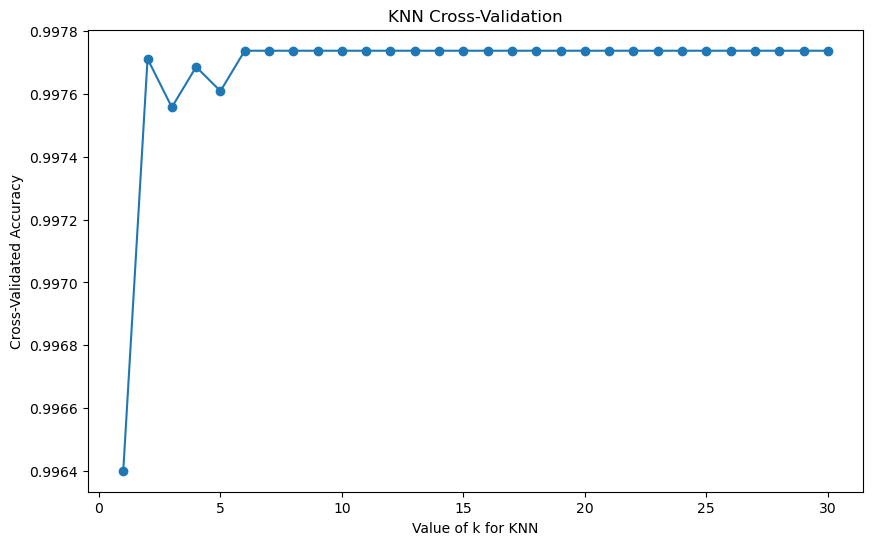

In [31]:


# Assuming X_train_scaled and Y_train are your features and labels, respectively, and are already prepared

# Range of k values to try
k_values = range(1, 31)
k_scores = []

# Perform cross-validation for each value of k
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    # Use cross-validation to evaluate model
    scores = cross_val_score(knn, X_train_scaled, Y_train, cv=10, scoring='accuracy')  # cv=10 for 10-fold cross-validation
    k_scores.append(scores.mean())

# Find the value of k that produces the highest average score
best_k = k_values[np.argmax(k_scores)]
print(f"Best k: {best_k} with average score: {max(k_scores)}")

# Optionally, plot the results to see the trend
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(k_values, k_scores, marker='o')
plt.xlabel('Value of k for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.title('KNN Cross-Validation')
plt.show()


In [36]:
# Instantiate KNN
knn = KNeighborsClassifier()

# Training the KNN model
knn.fit(X_train_scaled, Y_train)

# Evaluating the KNN model
accuracy = knn.score(X_test_scaled, Y_test)
print(f"Accuracy: {accuracy}")

# Predicting with the KNN model
predictions = knn.predict(X_test_scaled)

# Comparing actual and predicted values
comparison = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions})

# Filtering for mismatches
mask = comparison['Actual'] != comparison['Predicted']
differences = comparison[mask]

print(differences)
print(f"Number of mismatches: {len(differences)}")

# k=6 accuracy : 0.998560411311054
# k=5 accuracy : 0.9989717223650385 (Standard)

Accuracy: 0.9989717223650385
                 Actual  Predicted
drugA   drugB                     
DB02701 DB00443       1          0
DB00281 DB00750       1          0
        DB00591       1          0
DB00201 DB00945       1          0
DB00281 DB01718       1          0
DB00691 DB00999       1          0
DB00264 DB00999       1          0
DB00381 DB01076       1          0
DB00316 DB00388       1          0
DB01086 DB00825       1          0
Number of mismatches: 10


In [37]:
from sklearn.metrics import classification_report

# Annahme: Sie haben Ihr Modell bereits trainiert und Vorhersagen generiert
# predictions = knn.predict(X_test_scaled)
# Y_test enthält die tatsächlichen Klassenlabels

# Berechnung und Ausgabe von F1-Score, Präzision und Rückruf für jede Klasse
report = classification_report(Y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9711
           1       1.00      0.29      0.44        14

    accuracy                           1.00      9725
   macro avg       1.00      0.64      0.72      9725
weighted avg       1.00      1.00      1.00      9725

